# SVC Test

This is an example use case of a support vector classifier. We will infer a data classification function from a set of training data.

We will use the SVC implementation in the [scikit-learn](http://scikit-learn.org/) toolbox.

In [1]:
from sklearn import svm
import pandas as pd
import pylab as pl
import seaborn as sns

%matplotlib inline

We begin by defining a set of training points. This is the set which the classifier will use to infer the data classification function. Each row represents a data point, with x,y coordinates and classification value.

In [2]:
fit_points = [
  [2,1,1],
  [1,2,1],
  [3,2,1],
  [4,2,0],
  [4,4,0],
  [5,1,0]
]

To understand the data set, we can plot the points from both classes (1 and 0). Points of class 1 are in black, and points from class 0 in red.

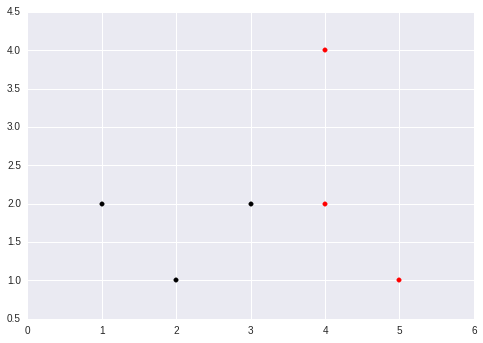

In [3]:
sns.set(style="darkgrid")
pl.scatter([point[0] if point[2]==1 else None for point in fit_points],
           [point[1] for point in fit_points],
           color = 'black')
pl.scatter([point[0] if point[2]==0 else None for point in fit_points],
           [point[1] for point in fit_points],
           color = 'red')
pl.grid(True)
pl.show()

The SVC uses [pandas](http://pandas.pydata.org/) data frames to represent data. The [data frame](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html) is a convenient data structure for tabular data, which enables column labels.

In [4]:
df_fit = pd.DataFrame(fit_points, columns=["x", "y", "value"])
print(df_fit)

   x  y  value
0  2  1      1
1  1  2      1
2  3  2      1
3  4  2      0
4  4  4      0
5  5  1      0


We need to select the set of columns with the data features. In our example, those are the `x` and `y` coordinates.

In [5]:
train_cols = ["x", "y"]

We are now able to build and train the classifier.

In [6]:
clf = svm.SVC()
clf.fit(df_fit[train_cols], df_fit.value)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

The classifier is now trained with the fit points, and is ready to be evaluated with a set of test points, which have a similiar structure as the fit points: `x`, `y` coordinates, and a value.

In [7]:
test_points = [
  [5,3],
  [4,5],
  [2,5],
  [2,3],
  [1,1]
]

We separate the features and values to make clear were the data comes from.

In [8]:
test_points_values = [0,0,0,1,1]

We build the test points dataframe with the features.

In [9]:
df_test = pd.DataFrame(test_points, columns=['x','y'])
print(df_test)

   x  y
0  5  3
1  4  5
2  2  5
3  2  3
4  1  1


We can add the values to the dataframe.

In [10]:
df_test['real_value'] = test_points_values
print(df_test)

   x  y  real_value
0  5  3           0
1  4  5           0
2  2  5           0
3  2  3           1
4  1  1           1


Right now we have a dataframe similar to the one with the fit points. We'll use the classifier to add a fourth column with the predicted values. Our goal is to have the same value in both `real_value` and `predicted_value` columns.

In [11]:
df_test['predicted_value'] = clf.predict(test_points)
print(df_test)

   x  y  real_value  predicted_value
0  5  3           0                0
1  4  5           0                0
2  2  5           0                0
3  2  3           1                1
4  1  1           1                1


THe classifier is pretty successfull at predicting values from the `x` and `y`coordinates. We may also apply the classifier to the fit points - it's somewhat pointless, because those are the points used to infer the data classification function.

In [12]:
df_fit[''] = clf.predict([x[0:2] for x in fit_points])
print(df_fit)

   x  y  value   
0  2  1      1  1
1  1  2      1  1
2  3  2      1  1
3  4  2      0  0
4  4  4      0  0
5  5  1      0  0


To better understand the data separation between values 1 and 0, we'll plot both the fit points and the test points.

Following the same color code as before, points that belong to class 1 are represented in black, and points that belong to class 0 in red. Fit points are represented in a full cirle, and the test points are represented by circunferences.

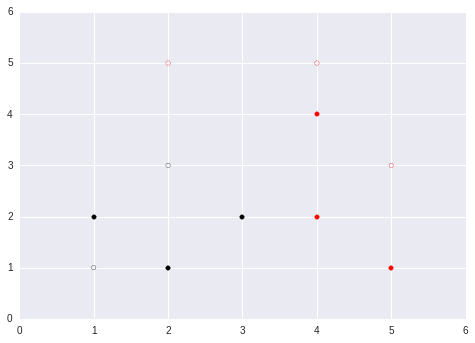

In [13]:
sns.set(style="darkgrid")
for i in range(0,2):
  pl.scatter(df_fit[df_fit.value==i].x,
             df_fit[df_fit.value==i].y,
             color = 'black' if i == 1 else 'red')
  pl.scatter(df_test[df_test.predicted_value==i].x,
             df_test[df_test.predicted_value==i].y,
             marker='o',
             facecolor='none',
             color='black' if i == 1 else 'red')
pl.grid(True)
pl.show()